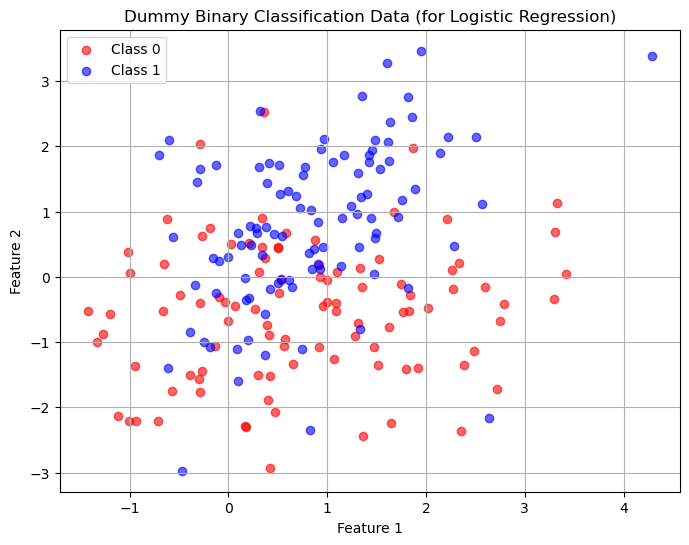

Features shape: (200, 2)
Target shape: (200,)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import math

# Set seed
np.random.seed(42)

# Generate a classification dataset
x, y = make_classification(
    n_samples=200,
    n_features=2,          # Only 2 useful features for visualization
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.8,         # Low separation makes it harder
    flip_y=0.1,            # Add noise (10% label flipping)
    random_state=42
)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color="red", label="Class 0", alpha=0.6)
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color="blue", label="Class 1", alpha=0.6)
plt.title("Dummy Binary Classification Data (for Logistic Regression)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

print("Features shape:", x.shape)
print("Target shape:", y.shape)
y= y.reshape(-1,1)
y = np.hstack((1-y,y))

(200, 2)
Accuracy:  99.50%
0.0072625349885365
Min prediction: 3.974192689096223e-09
Max prediction: 0.9999999960258072


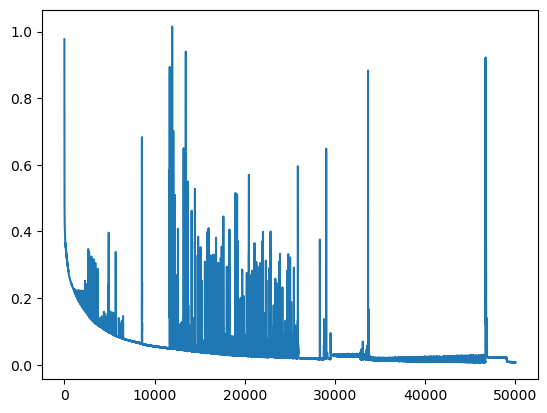

In [3]:
#softmax implementation
print(y.shape)
x_mean = np.mean(x)
x_std = np.std(x)
x = (x-x_mean)/x_std
x1 = x[:,0].reshape(-1,1)
x2 = x[:,1].reshape(-1,1)
def preprocess_input(x):
    x1 = x[:, 0].reshape(-1, 1)
    x2 = x[:, 1].reshape(-1, 1)
    return np.hstack((x1, x2))
x = np.hstack((x1,x2))
x_preprocessed = preprocess_input(x)
m = x_preprocessed.shape[0]

def sigmoid(z):
     z = np.clip(z, -500, 500)
     return 1/(1+np.exp(-z))


def d_sigmoid(z):
    s = sigmoid(z)
    return s*(1-s)

def ReLu(z):
    return np.maximum(0,z)

def d_ReLu(z):
    return (z > 0).astype(float)

def softmax(z):
    e_z = np.exp(z-np.max(z,axis=1,keepdims=True))
    return e_z/np.sum(e_z,axis=1,keepdims=True)


def dense(A_in,W,B,activation):
    Z = A_in@W +B
    if(activation == 'ReLu'):
        A_out = ReLu(Z)
    elif(activation == 'sigmoid'):
        A_out = sigmoid(Z)
    elif(activation =="softmax"):
        A_out = softmax(Z)
    return Z,A_out
layers = [2,50,50,50,50,2]
activation_fn = ["ReLu","ReLu","sigmoid","sigmoid","softmax"]
lr = 0.05
np.random.seed(0)
w = [np.random.randn(layers[i],layers[i+1])for i in range(len(layers)-1)]
b = [np.zeros((1,layers[i+1]))for i in range(len(layers)-1)]
def sequential(x):
    A = x
    z_values = []
    a_values = [x]
    for i in range(len(w)):
        Z, A = dense(A, w[i], b[i], activation_fn[i])
        z_values.append(Z)
        a_values.append(A)
    return z_values, a_values

def backward(y,z_values,a_values,lr):
    global w,b
    m = y.shape[0]
    L  = len(w)
    dz = a_values[-1]-y

    for i in reversed(range(L)):
        A_prev = a_values[i]
        dw = (A_prev.T @ dz) / m
        db = np.sum(dz, axis=0, keepdims=True) / m
        w[i] -= lr * dw
        b[i] -= lr * db

        if i > 0:
            da = dz @ w[i].T
            if activation_fn[i-1] == 'ReLu':
                dz = da * d_ReLu(z_values[i-1])
            elif activation_fn[i-1]=='sigmoid':
                dz = da * d_sigmoid(z_values[i-1])
            



iteration = 50000
cost = []
for i in range(iteration):
    z_values,a_values = sequential(x_preprocessed)
    
    a_final = a_values[-1]
    dz = np.zeros((m,2))
    a = a_values[-1]
    dz[:, 0] = -y[:, 0] * (1 - a[:, 0]) + y[:, 1] * a[:, 0]
    dz[:, 1] = -y[:, 1] * (1 - a[:, 1]) + y[:, 0] * a[:, 1]
    epsilon = 1e-8
    cst = -np.mean(np.sum(y * np.log(a_final + epsilon), axis=1))
    cost.append(cst)

    backward(y, z_values, a_values, lr)


def predict(x):
    x = preprocess_input(x)
    _,a_values = sequential(x)
    return a_values[-1]

binary_predictions = (preds >= 0.5).astype(int)
accuracy = np.mean(binary_predictions == y)
print(f"Accuracy:  {accuracy*100:.2f}%")
plt.plot(cost)
print(cost[-1])
preds = predict(x)
print("Min prediction:", np.min(preds))
print("Max prediction:", np.max(preds))


(200, 2)
0.36635525859400425
Min prediction: 1.926855883471285e-07
Max prediction: 0.9999998073144116


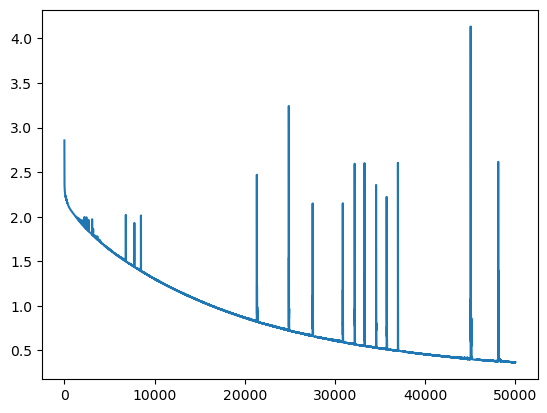

In [22]:
#softmax implementation with regularization
print(y.shape)
x_mean = np.mean(x)
x_std = np.std(x)
x = (x-x_mean)/x_std
x1 = x[:,0].reshape(-1,1)
x2 = x[:,1].reshape(-1,1)
def preprocess_input(x):
    x1 = x[:, 0].reshape(-1, 1)
    x2 = x[:, 1].reshape(-1, 1)
    return np.hstack((x1, x2))
x = np.hstack((x1,x2))
x_preprocessed = preprocess_input(x)
m = x_preprocessed.shape[0]

def sigmoid(z):
     z = np.clip(z, -500, 500)
     return 1/(1+np.exp(-z))


def d_sigmoid(z):
    s = sigmoid(z)
    return s*(1-s)

def ReLu(z):
    return np.maximum(0,z)

def d_ReLu(z):
    return (z > 0).astype(float)

def softmax(z):
    e_z = np.exp(z-np.max(z,axis=1,keepdims=True))
    return e_z/np.sum(e_z,axis=1,keepdims=True)


def dense(A_in,W,B,activation):
    Z = A_in@W +B
    if(activation == 'ReLu'):
        A_out = ReLu(Z)
    elif(activation == 'sigmoid'):
        A_out = sigmoid(Z)
    elif(activation =="softmax"):
        A_out = softmax(Z)
    return Z,A_out
layers = [2,50,50,50,50,2]
activation_fn = ["ReLu","ReLu","sigmoid","sigmoid","softmax"]
lr = 0.05
lambd = 0.1
np.random.seed(0)
w = [np.random.randn(layers[i],layers[i+1])for i in range(len(layers)-1)]
b = [np.zeros((1,layers[i+1]))for i in range(len(layers)-1)]
def sequential(x):
    A = x
    z_values = []
    a_values = [x]
    for i in range(len(w)):
        Z, A = dense(A, w[i], b[i], activation_fn[i])
        z_values.append(Z)
        a_values.append(A)
    return z_values, a_values

def backward(y,z_values,a_values,lr):
    global w,b
    m = y.shape[0]
    L  = len(w)
    dz = a_values[-1]-y

    for i in reversed(range(L)):
        A_prev = a_values[i]
        dw = ((A_prev.T @ dz) / m) + (lambd/m)*w[i]
        db = np.sum(dz, axis=0, keepdims=True) / m
        w[i] -= lr * dw
        b[i] -= lr * db

        if i > 0:
            da = dz @ w[i].T
            if activation_fn[i-1] == 'ReLu':
                dz = da * d_ReLu(z_values[i-1])
            elif activation_fn[i-1]=='sigmoid':
                dz = da * d_sigmoid(z_values[i-1])
            



iteration = 50000
cost = []
for i in range(iteration):
    z_values,a_values = sequential(x_preprocessed)
    
    a_final = a_values[-1]
    epsilon = 1e-8
    cst = -np.mean(np.sum(y * np.log(a_final + epsilon), axis=1))
    re = (lambd / (2 * m)) * sum(np.sum(wi**2) for wi in w)
    cst += re
    cost.append(cst)

    backward(y, z_values, a_values, lr)


def predict(x):
    x = preprocess_input(x)
    _,a_values = sequential(x)
    return a_values[-1]

# binary_predictions = (preds >= 0.5).astype(int)
# accuracy = np.mean(binary_predictions == y)
# print(f"Accuracy:  {accuracy*100:.2f}%")
plt.plot(cost)
print(cost[-1])
preds = predict(x)
print("Min prediction:", np.min(preds))
print("Max prediction:", np.max(preds))
